In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Retail Sales Forecasting.csv")

In [3]:
df.head()

,date,Sale,Stock,price
0,1/1/2014,0,4972,1.29
1,1/2/2014,70,4902,1.29
2,1/3/2014,59,4843,1.29
3,1/4/2014,93,4750,1.29
4,1/5/2014,96,4654,1.29


In [4]:
df.shape

(937, 4)

In [5]:
df.isnull().sum()

date     0
Sale     0
Stock    0
price    0
dtype: int64

In [6]:
df.dtypes

date      object
Sale       int64
Stock      int64
price    float64
dtype: object

In [7]:
df["date"] = pd.to_datetime(df["date"])

In [8]:
df.dtypes

date     datetime64[ns]
Sale              int64
Stock             int64
price           float64
dtype: object

In [9]:
df["Revenue"] = df["Sale"] * df["price"]

In [10]:
df.head()

,date,Sale,Stock,price,Revenue
0,2014-01-01,0,4972,1.29,0.00
1,2014-01-02,70,4902,1.29,90.30
2,2014-01-03,59,4843,1.29,76.11
3,2014-01-04,93,4750,1.29,119.97
4,2014-01-05,96,4654,1.29,123.84


In [11]:
df["Day"] = df["date"].dt.day
df["Month"] = df["date"].dt.month
df["Year"] = df["date"].dt.year
df.head()

,date,Sale,Stock,price,Revenue,Day,Month,Year
0,2014-01-01,0,4972,1.29,0.00,1,1,2014
1,2014-01-02,70,4902,1.29,90.30,2,1,2014
2,2014-01-03,59,4843,1.29,76.11,3,1,2014
3,2014-01-04,93,4750,1.29,119.97,4,1,2014
4,2014-01-05,96,4654,1.29,123.84,5,1,2014


In [12]:
df[df["Revenue"] == df["Revenue"].max()]

,date,Sale,Stock,price,Revenue,Day,Month,Year
880,2016-06-05,336,3492,2.59,870.24,5,6,2016


In [13]:
df[df["Sale"] == df["Sale"].max()]

,date,Sale,Stock,price,Revenue,Day,Month,Year
305,2014-11-08,542,175,1.49,807.58,8,11,2014


In [14]:
((df.corr()>0.1)|(df.corr()<-0.1))*df.corr()  #calculatin the correlation, ignoring those with absolute value less than 0.1

,Sale,Stock,price,Revenue,Day,Month,Year
Sale,1.000000,0.153659,0.000000,0.912127,-0.0,-0.000000,0.264477
Stock,0.153659,1.000000,-0.000000,0.151113,0.0,-0.364307,-0.153145
price,0.000000,-0.000000,1.000000,0.399306,0.0,-0.000000,0.618943
Revenue,0.912127,0.151113,0.399306,1.000000,-0.0,-0.000000,0.474632
Day,-0.000000,0.000000,0.000000,-0.000000,1.0,0.000000,-0.000000
Month,-0.000000,-0.364307,-0.000000,-0.000000,0.0,1.000000,-0.265074
Year,0.264477,-0.153145,0.618943,0.474632,-0.0,-0.265074,1.000000


In [15]:
day_sales = df.groupby("Day").mean()
day_sales = day_sales[["Sale", "Stock", "price", "Revenue"]]

Text(0.5, 1.0, 'Revenue')

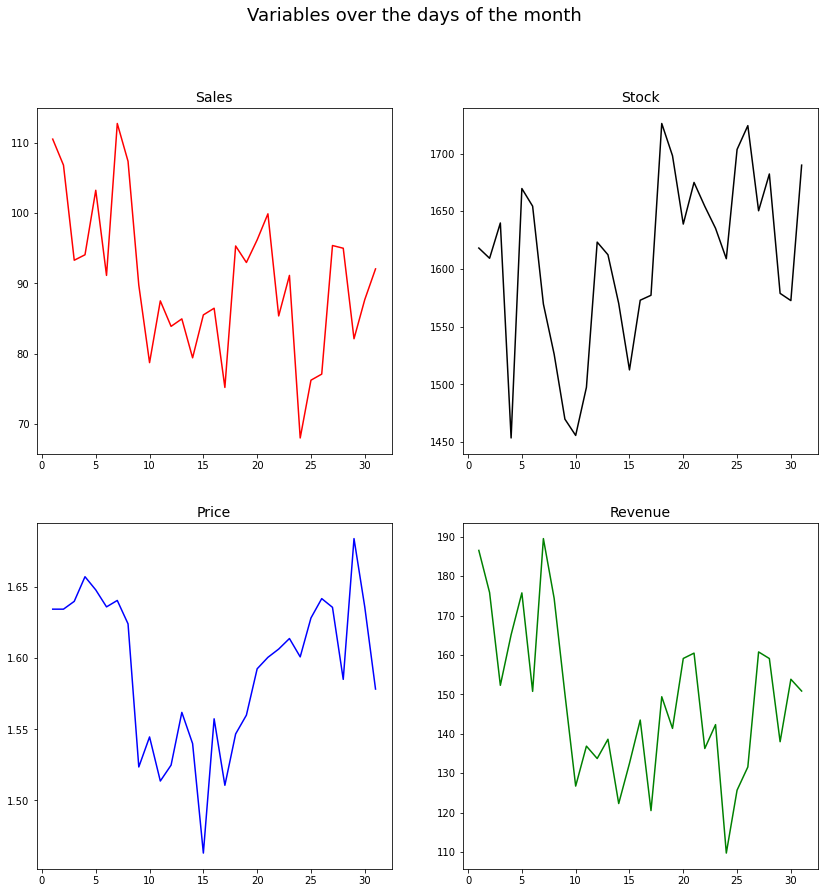

In [16]:
fig, axs = plt.subplots(2, 2 , figsize = [14, 14])
fig.suptitle('Variables over the days of the month', fontsize = 18)
axs[0, 0].plot(day_sales.index, day_sales.Sale, color = 'red')
axs[0, 0].set_title('Sales', fontsize = 14)
axs[0, 1].plot(day_sales.index, day_sales.Stock, color = 'black')
axs[0, 1].set_title('Stock', fontsize = 14)
axs[1, 0].plot(day_sales.index, day_sales.price, color = 'blue')
axs[1, 0].set_title('Price', fontsize = 14)
axs[1, 1].plot(day_sales.index, day_sales.Revenue, color = 'green')
axs[1, 1].set_title('Revenue', fontsize = 14)

In [17]:
# rescaling all the variables
dsm = day_sales
dsm.head()
# multiplying by the mean differences to ensure all are on the same scale
dsm['price'] = dsm['price'] * 1010
dsm['Sale'] = dsm['Sale'] * 17.77
dsm['Revenue'] = dsm['Revenue'] * 10.8
dsm = dsm.reset_index()

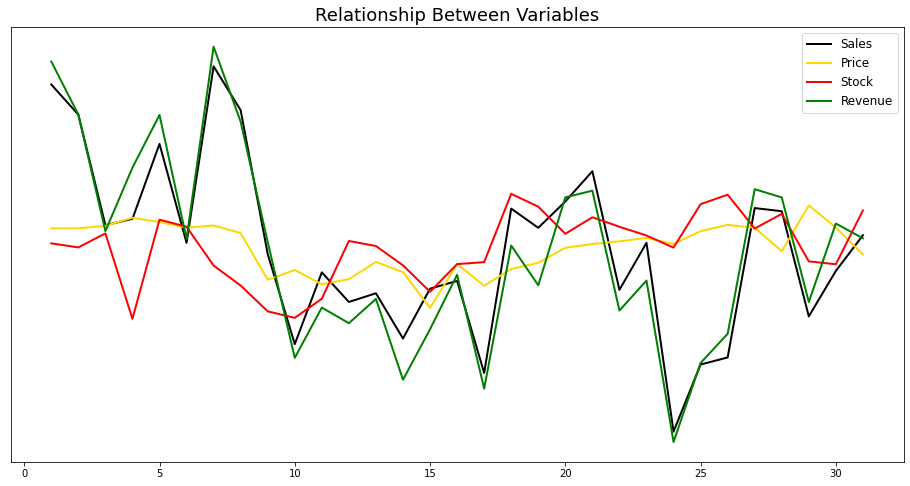

In [18]:
plt.figure(figsize=(16,8))
plt.title('Relationship Between Variables', fontsize = 18)
plt.plot('Day', 'Sale', data = dsm, color='black', linewidth=2, label = "Sales")
plt.plot('Day', 'price', data = dsm, color='gold', linewidth=2, label = "Price")
plt.plot('Day', 'Stock', data = dsm, color='red', linewidth=2, label="Stock")
plt.plot('Day', 'Revenue', data = dsm, color='green', linewidth=2, label="Revenue")
plt.yticks([])
plt.legend(fontsize = 12)